### Forecasting Models on –ö–†–° 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from pylab import rcParams
from IPython.display import display
import math
from prophet import Prophet
pd.set_option('display.max_columns', 130)


import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)



#### Data preparation

In [39]:
df = pd.read_excel("–î–∞—Ç–∞—Å–µ—Ç –ø–æ –ö–†–°.xlsx")
df.head(5)

–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥      –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-01  4455.35     9.8        372560.0   -12.490323
1  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-02  3654.20     9.8        399442.0   -10.192857
2  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-03  4287.08     8.3        425605.0    -5.870968
3  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-04  3923.21     8.8        440023.0     4.490000
4  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-05  3849.70    42.8        444647.0    14.574194

In [40]:
df_akmola = df[df['–†–µ–≥–∏–æ–Ω'] == '–ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨']
df_akmola.head()

–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥      –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-01  4455.35     9.8        372560.0   -12.490323
1  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-02  3654.20     9.8        399442.0   -10.192857
2  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-03  4287.08     8.3        425605.0    -5.870968
3  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-04  3923.21     8.8        440023.0     4.490000
4  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-05  3849.70    42.8        444647.0    14.574194

In [41]:
df_akmola = df_akmola.rename(columns={'–ö–†–°': '–û–±—ä–µ–º —É–±–æ—è: –ö–†–°'})
df_akmola.head()

–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  \
0  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-01          4455.35     9.8        372560.0   
1  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-02          3654.20     9.8        399442.0   
2  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-03          4287.08     8.3        425605.0   
3  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-04          3923.21     8.8        440023.0   
4  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-05          3849.70    42.8        444647.0   

   –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  
0   -12.490323  
1   -10.192857  
2    -5.870968  
3     4.490000  
4    14.574194

### EDA

In [42]:
df_akmola.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   –†–µ–≥–∏–æ–Ω           120 non-null    object 
 1   –ü–µ—Ä–∏–æ–¥           120 non-null    object 
 2   –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  120 non-null    float64
 3   –û—Å–∞–¥–∫–∏           120 non-null    float64
 4   –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°   120 non-null    float64
 5   –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞      120 non-null    float64
dtypes: float64(4), object(2)
memory usage: 6.6+ KB


In [43]:
df_akmola.isna().sum()

–†–µ–≥–∏–æ–Ω             0
–ü–µ—Ä–∏–æ–¥             0
–û–±—ä–µ–º —É–±–æ—è: –ö–†–°    0
–û—Å–∞–¥–∫–∏             0
–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°     0
–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞        0
dtype: int64

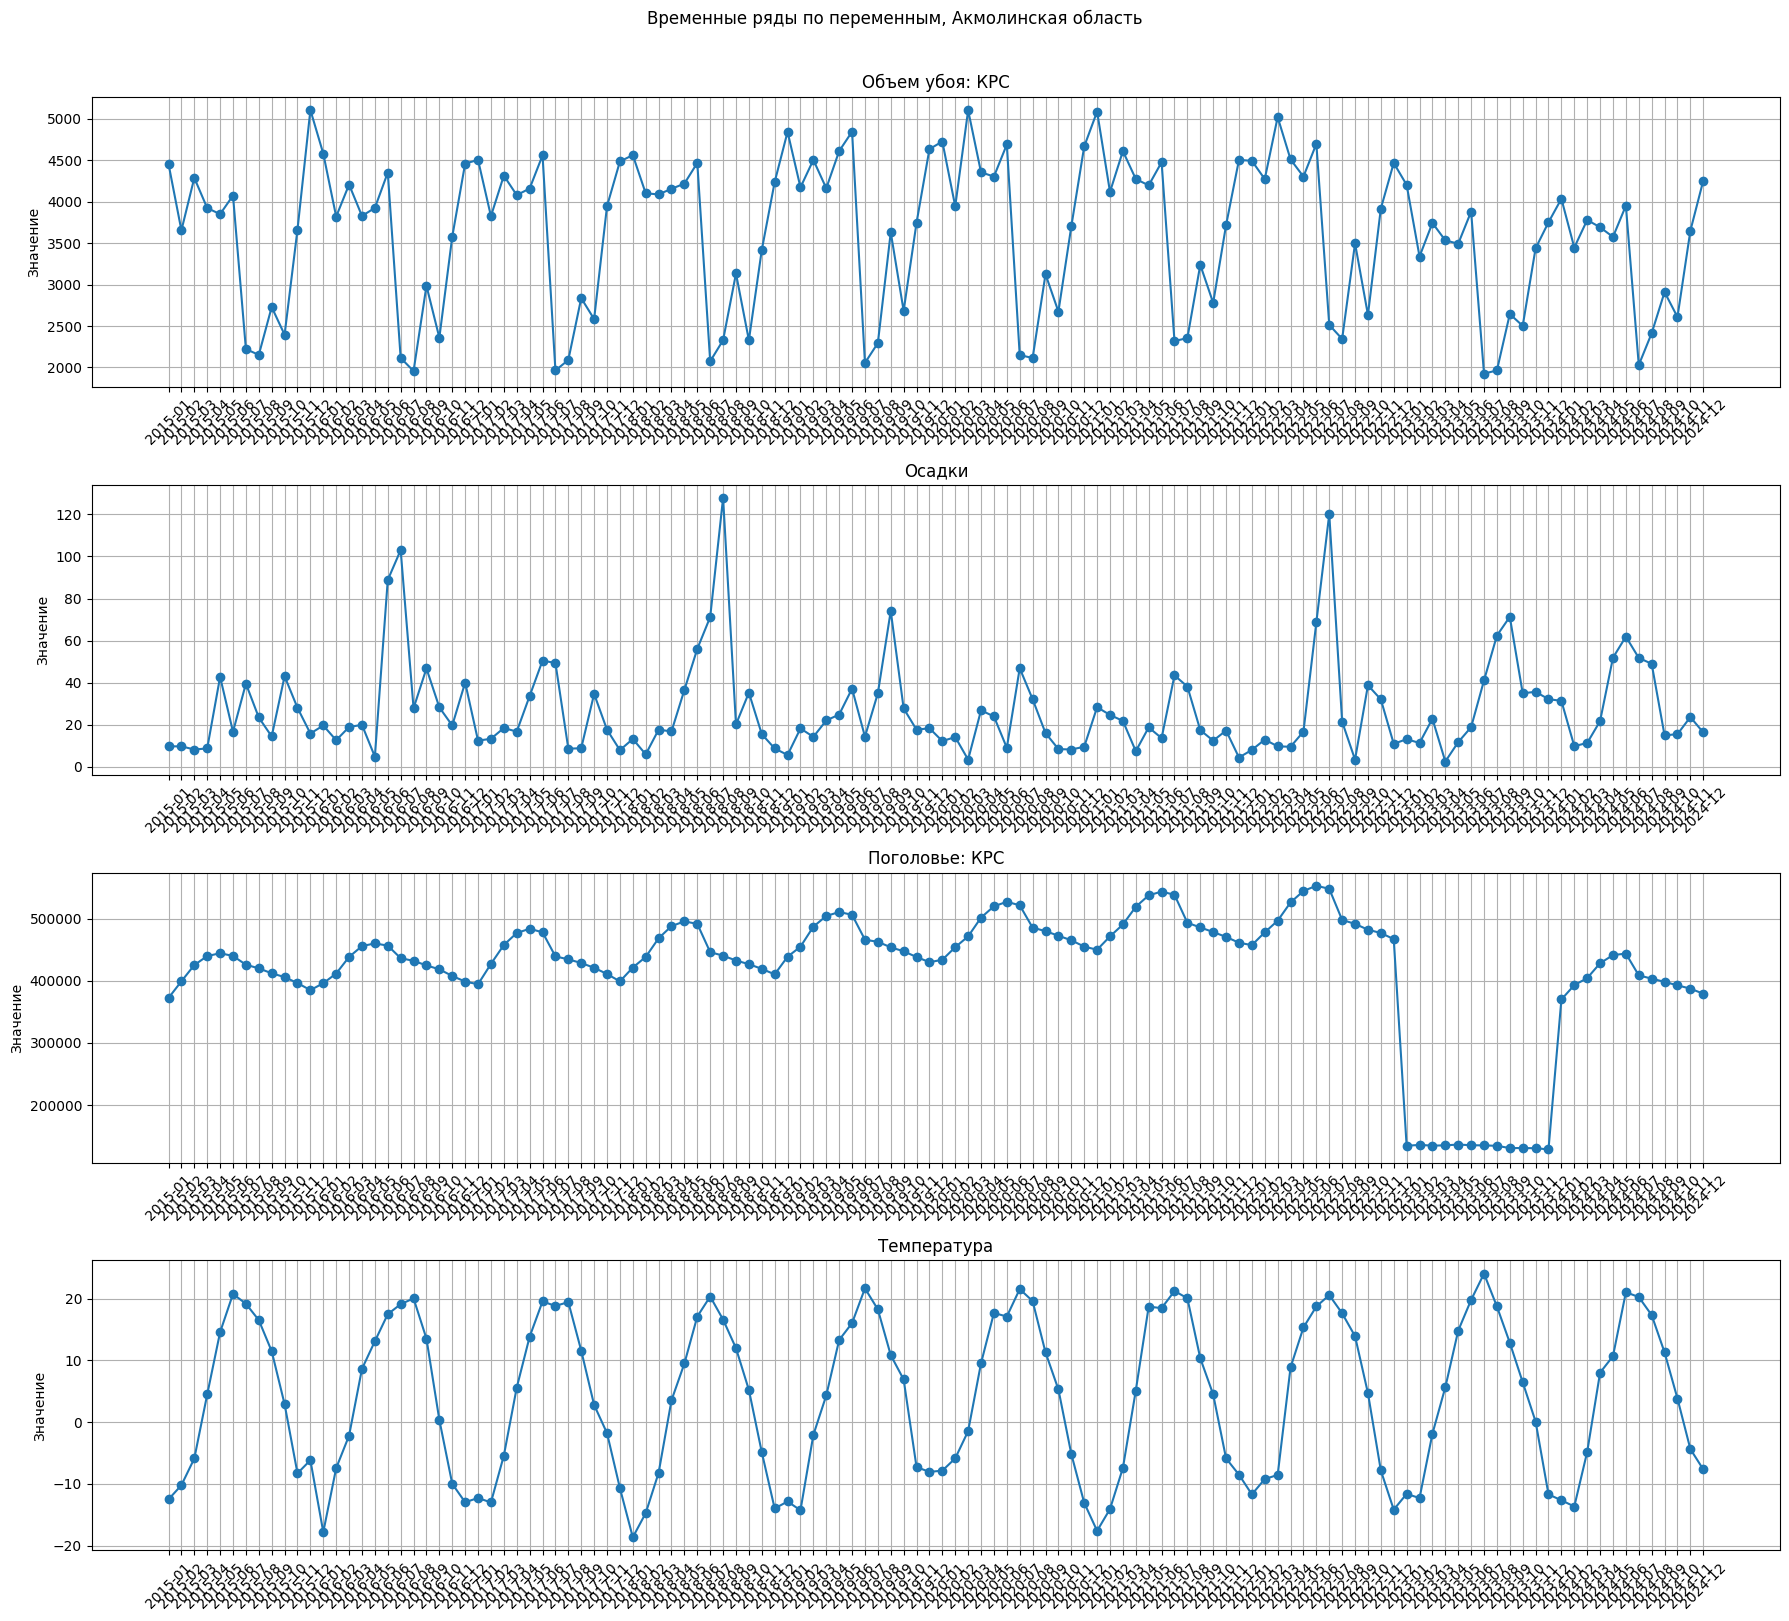

In [44]:
# Plot each variable in its own subplot
value_cols = [col for col in df_akmola.columns if col not in ["–ü–µ—Ä–∏–æ–¥", "–†–µ–≥–∏–æ–Ω"]]

n = len(value_cols)
plt.figure(figsize=(18, 4 * n))

for i, col in enumerate(value_cols, 1):
    plt.subplot(n, 1, i)
    plt.plot(df_akmola["–ü–µ—Ä–∏–æ–¥"], df_akmola[col], marker="o")
    plt.title(f"{col}")
    plt.grid(True)
    plt.ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ")
    plt.xticks(rotation=45)

plt.suptitle("–í—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã –ø–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å", y=1.01)
plt.tight_layout()
plt.show()


In [55]:
# # Add lag features to your dataframe
# for lag in range(1, 13):  # t-1 to t-4
#     df_akmola[f"–ö–†–°_t-{lag}"] = df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].shift(lag)

# # Drop NA rows (due to lag creation)
# df_akmola_lagged = df_akmola.dropna().copy()
# df_akmola_lagged

# Create lags (t-6 to t+6) for the target variable
for lag in range(-6, 7):
    if lag < 0:
        df_akmola[f"–ö–†–°_t+{abs(lag)}"] = df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].shift(lag)  # lead
    elif lag > 0:
        df_akmola[f"–ö–†–°_t-{lag}"] = df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].shift(lag)

# Drop NA rows caused by shifting
df_akmola_lagged = df_akmola.dropna().copy()
df_akmola_lagged = df_akmola_lagged[['–†–µ–≥–∏–æ–Ω', '–ü–µ—Ä–∏–æ–¥', '–û—Å–∞–¥–∫–∏', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°',
       '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–ö–†–°_t-6', '–ö–†–°_t-5', '–ö–†–°_t-4', '–ö–†–°_t-3', '–ö–†–°_t-2',
       '–ö–†–°_t-1', '–û–±—ä–µ–º —É–±–æ—è: –ö–†–°', '–ö–†–°_t+1', '–ö–†–°_t+2', '–ö–†–°_t+3', '–ö–†–°_t+4', '–ö–†–°_t+5', '–ö–†–°_t+6']]
df_akmola_lagged.head()


–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  \
6   –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-07    39.6        426134.0    19.180645   
7   –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-08    23.5        420244.0    16.529032   
8   –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-09    14.5        412301.0    11.496667   
9   –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-10    43.1        406176.0     2.925806   
10  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-11    28.1        396512.0    -8.270000   

    –ö–†–°_t-6  –ö–†–°_t-5  –ö–†–°_t-4  –ö–†–°_t-3  –ö–†–°_t-2  –ö–†–°_t-1  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  \
6   4455.35  3654.20  4287.08  3923.21  3849.70  4074.13          2221.96   
7   3654.20  4287.08  3923.21  3849.70  4074.13  2221.96          2151.76   
8   4287.08  3923.21  3849.70  4074.13  2221.96  2151.76          2728.61   
9   3923.21  3849.70  4074.13  2221.96  2151.76  2728.61          2395.25   
10  3849.70  4074.13  2221.96  2151.76  2728.61  2395.25          3662.75   

    –ö–†–°_t+1  –ö–†–°_t+2  –ö–†–°_t+3  –ö–†–°_t+4  –ö–†–°_t+5  –ö–†–°_t+6  
6   2151.76  2728.61  2395.25  3662.75  5106.13  4579.64  
7   2728.61  2395.25  3662.75  5106.13  4579.64  3819.89  
8   2395.25  3662.75  5106.13  4579.64  3819.89  4206.27  
9   3662.75  5106.13  4579.64  3819.89  4206.27  3828.08  
10  5106.13  4579.64  3819.89  4206.27  3828.08  3924.54

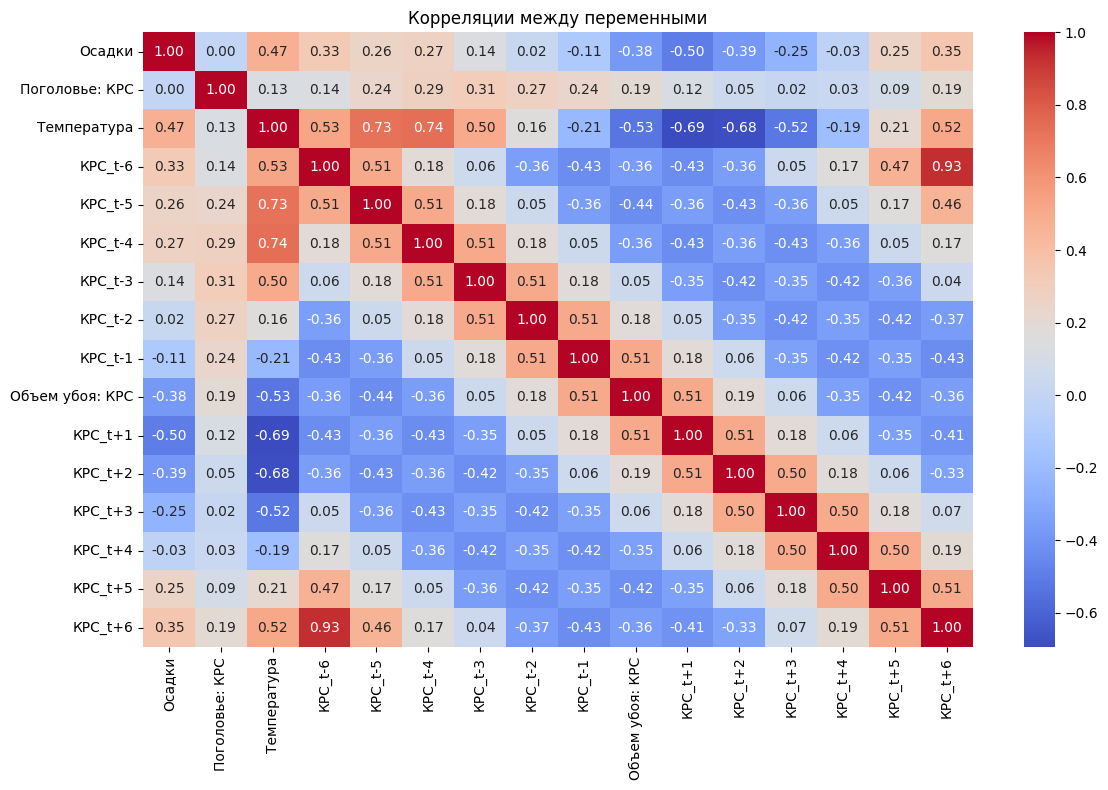

In [56]:
df_corr = df_akmola_lagged[[col for col in df_akmola_lagged.columns if col not in ["–†–µ–≥–∏–æ–Ω", "–ü–µ—Ä–∏–æ–¥"]]].dropna()

# 1. Correlation matrix
corr_matrix = df_corr.corr()

# 2. Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏")
plt.tight_layout()
plt.show()

* –°–∏–ª—å–Ω–∞—è –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (0.93) –º–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è —Å –ª–∞–≥–æ–º –≤ +6 –∏ -6 –º–µ—Å—è—Ü–µ–≤, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ (–≥–æ–¥–æ–≤–æ–π) —Å–µ–∑–æ–Ω–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä –¥–∏–Ω–∞–º–∏–∫–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è;
* –£–º–µ—Ä–µ–Ω–Ω–∞—è –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (~0.50) –º–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –∑–∞ –≤—Å–µ —Å–æ—Å–µ–¥—Å—Ç–≤—É—é—â–∏–µ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –ø–µ—Ä–∏–æ–¥—ã: –º–µ–∂–¥—É t0 –∏ t+1, t0 –∏ t-1, t+3 –∏ t+2, t+3 –∏ t+4 –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ. –≠—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –Ω–∞–ª–∏—á–∏–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö: –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –≤ —Ç–µ–∫—É—â–µ–º –º–µ—Å—è—Ü–µ —á–∞—Å—Ç–∏—á–Ω–æ –æ–±—ä—è—Å–Ω—è—é—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –≤ —Å–æ—Å–µ–¥–Ω–∏—Ö –º–µ—Å—è—Ü–∞—Ö. –≠—Ç–æ —Ç–∏–ø–∏—á–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ –∞–≥—Ä–∞—Ä–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–µ, –≥–¥–µ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–æ—Ü–µ—Å—Å—ã –∏–º–µ—é—Ç –∏–Ω–µ—Ä—Ü–∏–æ–Ω–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä. –≠—Ç–æ —Ç–∞–∫–∂–µ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (AR, ARIMA, SARIMA) –º–æ–≥—É—Ç —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö, —Ç–∞–∫ –∫–∞–∫ —Ç–µ–∫—É—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è "–ø–æ—Ö–æ–∂–∏" –Ω–∞ –Ω–µ–¥–∞–≤–Ω–∏–µ.
* –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ —Ç–µ–∫—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞ –∏ —Å–æ—Å–µ–¥—Å—Ç–≤—É—é—â–∏—Ö –º–µ—Å—è—Ü–µ–≤ –æ—Å–ª–∞–±–µ–≤–∞–µ—Ç –ø–æ—Å–ª–µ 3-—Ö –º–µ—Å—è—Ü–µ–≤, —á—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–ª–µ–¥—Å—Ç–≤–∏–µ–º –µ–∂–µ–∫–≤–∞—Ä—Ç–∞–ª—å–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –æ—Ç—á–µ—Ç–Ω–æ—Å—Ç–∏ –ø–æ –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –ö–§–• –∏ –Ω–∞—Å–µ–ª–µ–Ω–∏—è (–±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ) –∏ –≤–æ–∑–º–æ–∂–Ω–æ–π –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –º–µ—Å—è—Ü—ã.
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –≤ —Ç–µ–∫—É—â–µ–º –∏ —Å–æ—Å–µ–¥—Å—Ç–≤—É—é—â–∏—Ö –º–µ—Å—è—Ü–∞—Ö –∑–∞–º–µ—Ç–Ω–æ –æ—Å–ª–∞–±–µ–≤–∞–µ—Ç –ø–æ—Å–ª–µ –ª–∞–≥–æ–≤ ¬±3 –º–µ—Å—è—Ü–µ–≤. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –æ—Å–Ω–æ–≤–Ω–æ–π –æ–±—ä—ë–º –¥–∞–Ω–Ω—ã—Ö —Ñ–æ—Ä–º–∏—Ä—É–µ—Ç—Å—è –∑–∞ —Å—á—ë—Ç –æ—Ç—á–µ—Ç–Ω–æ—Å—Ç–∏ –∫—Ä–µ—Å—Ç—å—è–Ω—Å–∫–∏—Ö/—Ñ–µ—Ä–º–µ—Ä—Å–∫–∏—Ö —Ö–æ–∑—è–π—Å—Ç–≤ –∏ —Ö–æ–∑—è–π—Å—Ç–≤ –Ω–∞—Å–µ–ª–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ —Å–¥–∞—é—Ç –æ—Ç—á–µ—Ç–Ω–æ—Å—Ç—å –µ–∂–µ–∫–≤–∞—Ä—Ç–∞–ª—å–Ω–æ. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ, –º–µ—Å—è—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–≥—É—Ç –±—ã—Ç—å –ø–æ–ª—É—á–µ–Ω—ã –ø—É—Ç—ë–º –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π, —á—Ç–æ —Å–≥–ª–∞–∂–∏–≤–∞–µ—Ç –≤–Ω—É—Ç—Ä–∏–∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã–µ —Ä–∞–∑–ª–∏—á–∏—è, –Ω–æ —Å–Ω–∏–∂–∞–µ—Ç —Å–≤—è–∑—å –º–µ–∂–¥—É –∫–≤–∞—Ä—Ç–∞–ª–∞–º–∏.
* –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ –∏ –æ—Å–∞–¥–∫–∏ —É–º–µ—Ä–µ–Ω–Ω–æ –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±–µ–º–∞ —É–±–æ—è —Å –ª–∞–≥–æ–º –¥–æ 3-—Ö –º–µ—Å—è—Ü–µ–≤ (—Å –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω—ã–º —Å–Ω–∏–∂–µ–Ω–∏–µ–º —Å–∏–ª—ã –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏). 
* –ú–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –∏ –ø–æ–≥–æ–ª–æ–≤—å—è –≤ —Ä–∞–º–∫–∞—Ö —Ç–µ–∫—É—â–µ–≥–æ –∏ —Å–ª–µ–¥—É—é—â–µ–≥–æ –º–µ—Å—è—Ü–∞ –æ—Ç–º–µ—á–∞–µ—Ç—Å—è –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (0.19 –∏ 0.12). –ü—Ä–∏ —ç—Ç–æ–º —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∞ –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ-—É–º–µ—Ä–µ–Ω–Ω–∞—è –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å (0.20-0.30) –º–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –∑–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –º–µ—Å—è—Ü—ã (–¥–æ 5 –º–µ—Å—è—Ü–µ–≤ –Ω–∞–∑–∞–¥) –∏ –ø–æ–≥–æ–ª–æ–≤—å—è. 

**–î–û–ë–ê–í–ò–¢–¨ –ï–©–ï –ù–ï–ë–û–õ–¨–®–ò–ï –í–´–í–û–î–´**

In [ ]:
X_vif = add_constant(df_corr[[i for i in df_corr.columns if i != "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"]])

vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_data

Variable         VIF
0            const  653.417096
1           –û—Å–∞–¥–∫–∏    1.559632
2   –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°    2.846363
3      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞   15.053594
4          –ö–†–°_t-6    8.591529
5          –ö–†–°_t-5    5.066881
6          –ö–†–°_t-4    4.743597
7          –ö–†–°_t-3    4.232776
8          –ö–†–°_t-2    3.746488
9          –ö–†–°_t-1    3.710058
10         –ö–†–°_t+1    4.400648
11         –ö–†–°_t+2    3.372869
12         –ö–†–°_t+3    4.524660
13         –ö–†–°_t+4    2.667847
14         –ö–†–°_t+5    4.171034
15         –ö–†–°_t+6    9.531878

### Multivariate Regression

#### check statistical significance

In [ ]:
y = df_akmola["–ö–†–°"]
X = df_akmola[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Print model summary
print(f"\nüìç –†–µ–≥–∏–æ–Ω: {df_akmola.loc[0]['–†–µ–≥–∏–æ–Ω']}")
print(model.summary())

#     # ‚úÖ Collect results
#     for var in model.params.index:
#         results_list.append({
#             "–†–µ–≥–∏–æ–Ω": region,
#             "–ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è": var,
#             "–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç": model.params[var],
#             "p-value": model.pvalues[var],
#             "R-–∫–≤–∞–¥—Ä–∞—Ç": model.rsquared
#         })

# # Convert to DataFrame
# results_df = pd.DataFrame(results_list)

# # Export to Excel
# # results_df.to_excel("krs_linear_regression_results.xlsx", index=False)

# print("\n –ì–æ—Ç–æ–≤–æ! –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω—ã –≤ 'krs_linear_regression_results.xlsx'")


#### forecast using MLR

In [ ]:
# Forecasting horizon
forecast_horizon = 3

# Container for summary results
results = []

# Loop through each region
for region in df_model["–†–µ–≥–∏–æ–Ω"].unique():
    if region == "–†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù":
        continue  # ‚õî skip this region
    df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region].sort_values("–ü–µ—Ä–∏–æ–¥")

    if df_r.shape[0] < forecast_horizon + 12:
        continue  # skip if not enough data

    # Train-test split
    df_train = df_r.iloc[:-forecast_horizon]
    df_test = df_r.iloc[-forecast_horizon:]

    X_train = df_train[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
    y_train = df_train["–ö–†–°"]
    X_test = df_test[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
    y_test = df_test["–ö–†–°"]

    # Fit model
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = (abs((y_test - y_pred) / y_test).mean()) * 100

    results.append({
        "–†–µ–≥–∏–æ–Ω": region,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        "R¬≤ (Train)": model.score(X_train, y_train)
    })

# Save results
results_df = pd.DataFrame(results)
# results_df.to_excel("mlr_forecast_evaluation_by_region.xlsx", index=False)

results_df


In [ ]:
# Calculate and print mean metrics
mean_mape = results_df["MAPE (%)"].mean()
mean_rmse = results_df["RMSE"].mean()
mean_mae = results_df["MAE"].mean()

print(f"–°—Ä–µ–¥–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º:")
print(f"–°—Ä–µ–¥–Ω–∏–π MAPE: {mean_mape:.2f}%")
print(f"–°—Ä–µ–¥–Ω–∏–π RMSE: {mean_rmse:.2f}")
print(f"–°—Ä–µ–¥–Ω–∏–π MAE: {mean_mae:.2f}")

#### regression for Kazakhstan - –ü–æ–≥–æ–ª–æ–≤—å–µ not statistically significant

In [ ]:
df_kazakhstan = df_model[df_model['–†–µ–≥–∏–æ–Ω'] == '–†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù'][["–ö–†–°", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°"]].dropna()
y = df_kazakhstan["–ö–†–°"]
X = df_kazakhstan[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Print model summary
print("–†–µ–≥–∏–æ–Ω: –†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù")
print(model.summary())

In [ ]:
# from sklearn.linear_model import Ridge

# # Forecasting horizon
# forecast_horizon = 3

# # Container for summary results
# results = []

# # Loop through each region
# for region in df_model["–†–µ–≥–∏–æ–Ω"].unique():
#     if region == "–†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù":
#         continue  # ‚õî skip this region
#     df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region].sort_values("–ü–µ—Ä–∏–æ–¥")

#     if df_r.shape[0] < forecast_horizon + 12:
#         continue  # skip if not enough data

#     # Train-test split
#     df_train = df_r.iloc[:-forecast_horizon]
#     df_test = df_r.iloc[-forecast_horizon:]

#     X_train = df_train[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#     y_train = df_train["–ö–†–°"]
#     X_test = df_test[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#     y_test = df_test["–ö–†–°"]

#     # Fit model
#     model = Ridge(alpha=1.0).fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     # Calculate metrics
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     mae = mean_absolute_error(y_test, y_pred)
#     mape = (abs((y_test - y_pred) / y_test).mean()) * 100

#     results.append({
#         "–†–µ–≥–∏–æ–Ω": region,
#         "RMSE": rmse,
#         "MAE": mae,
#         "MAPE (%)": mape,
#         "R¬≤ (Train)": model.score(X_train, y_train)
#     })

#     # Plot actual vs forecast
#     plt.figure(figsize=(6, 3))
#     plt.plot(df_test["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", label="–§–∞–∫—Ç")
#     plt.plot(df_test["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", label="–ü—Ä–æ–≥–Ω–æ–∑")
#     plt.title(f"{region} ‚Äî –ü—Ä–æ–≥–Ω–æ–∑ –æ–±—ä–µ–º–∞ –ö–†–° –Ω–∞ {forecast_horizon} –º–µ—Å—è—Ü–∞")
#     plt.xlabel("–ú–µ—Å—è—Ü")
#     plt.ylabel("–û–±—ä–µ–º –ö–†–°")
#     plt.legend()
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# # Save results
# results_df = pd.DataFrame(results)
# results_df.to_excel("ridge_forecast_evaluation_by_region.xlsx", index=False)

# print("‚úÖ –ì–æ—Ç–æ–≤–æ! –ú–µ—Ç—Ä–∏–∫–∏ –∏ –≥—Ä–∞—Ñ–∏–∫–∏ –ø—Ä–æ–≥–Ω–æ–∑–∞ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω—ã.")


In [ ]:
# # Forecasting horizon
# forecast_horizon = 12

# # Container for summary results
# results = []

# # Loop through each region
# for region in df_model["–†–µ–≥–∏–æ–Ω"].unique():
#     if region == "–†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù":
#         continue  # ‚õî skip this region
#     df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region].sort_values("–ü–µ—Ä–∏–æ–¥")

#     if df_r.shape[0] < forecast_horizon + 12:
#         continue  # skip if not enough data

#     # Train-test split
#     df_train = df_r.iloc[:-forecast_horizon]
#     df_test = df_r.iloc[-forecast_horizon:]

#     X_train = df_train[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#     y_train = df_train["–ö–†–°"]
#     X_test = df_test[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#     y_test = df_test["–ö–†–°"]

#     # Fit model
#     model = LinearRegression().fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     # Calculate metrics
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     mae = mean_absolute_error(y_test, y_pred)
#     mape = (abs((y_test - y_pred) / y_test).mean()) * 100

#     results.append({
#         "–†–µ–≥–∏–æ–Ω": region,
#         "RMSE": rmse,
#         "MAE": mae,
#         "MAPE (%)": mape,
#         "R¬≤ (Train)": model.score(X_train, y_train)
#     })

#     # üü¶ Optional: Plot actual vs forecast
#     plt.figure(figsize=(8, 4))
#     plt.plot(df_test["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", label="–§–∞–∫—Ç")
#     plt.plot(df_test["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", label="–ü—Ä–æ–≥–Ω–æ–∑")
#     plt.title(f"{region} ‚Äî –ü—Ä–æ–≥–Ω–æ–∑ –æ–±—ä–µ–º–∞ –ö–†–° –Ω–∞ {forecast_horizon} –º–µ—Å—è—Ü–∞")
#     plt.xlabel("–ú–µ—Å—è—Ü")
#     plt.ylabel("–û–±—ä–µ–º –ö–†–°")
#     plt.legend()
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# # Save results
# results_df = pd.DataFrame(results)
# results_df.to_excel("mlr_forecast_evaluation_by_region_12m.xlsx", index=False)

# print("‚úÖ –ì–æ—Ç–æ–≤–æ! –ú–µ—Ç—Ä–∏–∫–∏ –∏ –≥—Ä–∞—Ñ–∏–∫–∏ –ø—Ä–æ–≥–Ω–æ–∑–∞ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω—ã.")


In [ ]:
# def sliding_window_evaluation(df_r, forecast_horizon=3, window_count=9):
#     metrics = []

#     # Ensure sorted by time
#     df_r = df_r.sort_values("–ü–µ—Ä–∏–æ–¥").reset_index(drop=True)

#     for i in range(window_count):
#         # Define train and test split
#         train_end = i + 12  # require 12+ months for training
#         test_start = train_end
#         test_end = test_start + forecast_horizon

#         if test_end > len(df_r):
#             break

#         df_train = df_r.iloc[:train_end]
#         df_test = df_r.iloc[test_start:test_end]

#         X_train = df_train[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#         y_train = df_train["–ö–†–°"]
#         X_test = df_test[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#         y_test = df_test["–ö–†–°"]

#         # Fit model
#         model = LinearRegression().fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         # Calculate metrics
#         rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#         mae = mean_absolute_error(y_test, y_pred)
#         mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100

#         metrics.append({"RMSE": rmse, "MAE": mae, "MAPE": mape})

#     # Aggregate metrics over all sliding windows
#     return pd.DataFrame(metrics).mean().to_dict()

# results = []

# for region in df_model["–†–µ–≥–∏–æ–Ω"].unique():
#     if region == "–†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù":
#         continue  # Optional: exclude a region

#     df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region][["–ü–µ—Ä–∏–æ–¥", "–ö–†–°", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]].dropna()

#     if df_r.shape[0] < 24:
#         continue  # need enough data for multiple windows

#     metrics = sliding_window_evaluation(df_r)

#     results.append({
#         "–†–µ–≥–∏–æ–Ω": region,
#         "Avg RMSE": metrics["RMSE"],
#         "Avg MAE": metrics["MAE"],
#         "Avg MAPE (%)": metrics["MAPE"]
#     })

# # Save result
# results_df = pd.DataFrame(results)
# results_df.to_excel("sliding_window_forecast_evaluation.xlsx", index=False)

# print("‚úÖ –ì–æ—Ç–æ–≤–æ! –°—Ä–µ–¥–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –ø–æ —Å–∫–æ–ª—å–∑—è—â–∏–º –æ–∫–Ω–∞–º —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã.")



### Autoregressive Integrated Moving Average (ARIMA)

In [ ]:
# Container for forecast evaluation results
results = []

# Loop over each region
for region in df_model["–†–µ–≥–∏–æ–Ω"].unique():
    df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region].sort_values("–ü–µ—Ä–∏–æ–¥")
    y = df_r["–ö–†–°"].reset_index(drop=True)

    if y.isna().sum() > 0 or len(y) < 24:  # Need at least 2 full seasons
        continue

    # Split data
    test_size = 3
    y_train = y[:-test_size]
    y_test = y[-test_size:]

    try:
        # Auto SARIMA model selection
        model = auto_arima(
            y_train,
            seasonal=True,        # Enable SARIMA
            m=12,                 # Season length (12 months)
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )

        # Forecast
        forecast = model.predict(n_periods=test_size)

        # Evaluation
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "–†–µ–≥–∏–æ–Ω": region,
            "SARIMA order": model.order,
            "Seasonal order": model.seasonal_order,
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape
        })

        # Plot actual vs forecast
        plt.figure(figsize=(8, 4))
        plt.plot(y.index, y, color="lightgray", label="–í—Å–µ –¥–∞–Ω–Ω—ã–µ")
        plt.plot(y_test.index, y_test, marker="o", color="black", label="–§–∞–∫—Ç (—Ç–µ—Å—Ç)")
        plt.plot(y_test.index, forecast, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑")
        plt.axvline(len(y_train) - 1, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ Train/Test")
        plt.title(f"{region} ‚Äî SARIMA{model.order}x{model.seasonal_order} –ü—Ä–æ–≥–Ω–æ–∑ –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ {region}: {e}")

# Save results to Excel
results_df = pd.DataFrame(results)
results_df
# results_df.to_excel("sarima_forecast_evaluation_all_regions.xlsx", index=False)


In [ ]:
# Calculate and print mean metrics
mean_mape = results_df["MAPE (%)"].mean()
mean_rmse = results_df["RMSE"].mean()
mean_mae = results_df["MAE"].mean()

print(f"–°—Ä–µ–¥–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º:")
print(f"–°—Ä–µ–¥–Ω–∏–π MAPE: {mean_mape:.2f}%")
print(f"–°—Ä–µ–¥–Ω–∏–π RMSE: {mean_rmse:.2f}")
print(f"–°—Ä–µ–¥–Ω–∏–π MAE: {mean_mae:.2f}")

In [ ]:
# Step 1: Select one region's time series
region = "–ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨"
df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region].sort_values("–ü–µ—Ä–∏–æ–¥")
y = df_r["–ö–†–°"].reset_index(drop=True)

# Step 2: Check stationarity (ADF test)
result = adfuller(y)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("‚ùå Non-stationary ‚Äî differencing needed.")
else:
    print("‚úÖ Stationary")



In [ ]:
# Step 3: (If needed) difference the series
y_diff = y.diff().dropna()

In [ ]:
# Step 4: Fit ARIMA model (p,d,q) ‚Äî try (1,1,1) to start
model = ARIMA(y, order=(1,1,1))  # (p=1, d=1, q=1) ‚Äî adjust based on AIC later
model_fit = model.fit()

# Step 5: Forecast next 3 months
forecast = model_fit.forecast(steps=3)
print("üîÆ Forecast for next 3 months:")
print(forecast)

# Step 6: Plot
plt.figure(figsize=(10,5))
plt.plot(y, label="Actual")
plt.plot(np.arange(len(y), len(y)+3), forecast, label="Forecast", marker='o')
plt.title(f"ARIMA Forecast ‚Äî {region}")
plt.legend()
plt.grid(True)
plt.show()